# Immobile
Cascade Tuholske, Spring 2024  

Notebook to find the area-average ten-year average count for heat for global refugee camps.

In [1]:
# Dependencies 
import numpy as np
import xarray 
import os
import glob
import rasterio
import time
import multiprocessing as mp 
from multiprocessing import Pool
import sys
import matplotlib.pyplot as plt
import rasterstats
import geopandas as gpd
import xarray as xr
from rasterstats import zonal_stats
import matplotlib
import pandas as pd
from matplotlib import rcParams
import matplotlib.colors as mcolors
from shapely.geometry import Point
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib import cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset, zoomed_inset_axes
import matplotlib.patches as patches
from matplotlib.colors import Normalize
from rasterio.plot import show

## Zonal Stats

In [ ]:
# set up 
ssp = 'obs' #'2050_SSP585', obs, '2050_SSP245'
col = 'obs' # no _
data = 'wbgtmax'
thresh = '30'

In [ ]:
# files
path = '../data/processed/CHC-CMIP6/'
fn_in = os.path.join(path, 'CASA/interim/' + ssp + '.' + data + thresh + '.avg_count_07-16.tif')
fn_out = os.path.join(path, 'refugees/' + ssp + '.' + data + thresh + '.avg_count_07-16.shp')

In [ ]:
# Open refugee locs
gdf_fn = os.path.join('../../data/refugees/wrl_prp_p_unhcr_refugees_noLBN_onlySettlements-2024_02.geojson')
gdf = gpd.read_file(gdf_fn)
gdf.head(1)

In [ ]:
# check crs of polys
gdf.crs

In [ ]:
# check rst crs
rst_crs = rasterio.open(fn_in).crs
rst_crs

In [ ]:
# reproject polys if needed
# gdf.to_crs(rst_crs, inplace = True) # project to raster crs
# gdf.crs

In [ ]:
# subset columns needed
polys_in = gdf[['pcode', 'geometry']]
polys_in.head(1)

In [ ]:
# Run zonal stats
stats_type = 'mean'
zs_feats = zonal_stats(polys_in, fn_in, stats=stats_type, geojson_out=True)
zgdf = gpd.GeoDataFrame.from_features(zs_feats, crs=polys_in.crs)

In [ ]:
# check the data
plt.hist(zgdf['mean'])

In [ ]:
# rename column
zgdf.rename(columns = {'mean' : col}, inplace = True)
zgdf

In [ ]:
# check the data
plt.style.use('seaborn-v0_8-white')
zgdf.plot(col, cmap = 'viridis')
#plt.xlim(97,115)
#plt.ylim(-5,15)

In [ ]:
# add a fake row for plotting
# zgdf = zgdf.append({'geometry' : Point(-100,-100), 'pcode' : 'fake', col : 365}, ignore_index=True)
# zgdf.tail()

In [ ]:
# Save It Out
gdf_out = os.path.join(fn_out) # remove period '.' for Tmax obs
zgdf.to_file(gdf_out, index=False)

# Check Data

In [ ]:
obs = gpd.read_file(os.path.join('../data/processed/CHC-CMIP6/refugees/obs.wbgtmax30.avg_count_07-16.shp'))
ssp245 = gpd.read_file(os.path.join('../data/processed/CHC-CMIP6/refugees/2050_SSP245.wbgtmax30.avg_count_07-16.shp'))

In [ ]:
obs[obs['obs'].isna()]

In [ ]:
ssp245[ssp245['2050SSP245'].isna()]

# Fix Zeros

In [ ]:
# Fix zeros
fn_in = os.path.join('../data/processed/CHC-CMIP6/CASA/interim/obs.wbgtmax30.avg_count_07-16.tif')
arr = rasterio.open(fn_in).read(1)  # Open raster
arr = np.where(arr == 0, -9999, arr)
fn_out = os.path.join('../data/processed/CHC-CMIP6/CASA/interim/obs.wbgtmax30.avg_count_07-16_zeros.tif')
meta = rasterio.open(fn_in).meta
with rasterio.open(fn_out, 'w', **meta) as dst:
    dst.write(arr, 1)  # Write the modified data back to the same file

In [ ]:
# Fix zeros
fn_in = os.path.join('../data/processed/CHC-CMIP6/CASA/interim/2050_SSP245.wbgtmax30.avg_count_07-16.tif')
arr = rasterio.open(fn_in).read(1)  # Open raster
arr = np.where(arr == 0, -9999, arr)
fn_out = os.path.join('../data/processed/CHC-CMIP6/CASA/interim/2050_SSP245.wbgtmax30.avg_count_07-16_zeros.tif')
meta = rasterio.open(fn_in).meta
with rasterio.open(fn_out, 'w', **meta) as dst:
    dst.write(arr, 1)  # Write the modified data back to the same file

# Plot

In [2]:
# Open files 
countries = gpd.read_file('../../data/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')
obs = gpd.read_file(os.path.join('../data/processed/CHC-CMIP6/refugees/obs.wbgtmax30.avg_count_07-16.shp'))
ssp245 = gpd.read_file(os.path.join('../data/processed/CHC-CMIP6/refugees/2050_SSP245.wbgtmax30.avg_count_07-16.shp'))

In [3]:
# Open refugee locs
gdf_fn = os.path.join('../data/raw/refugees/wrl_prp_p_unhcr_refugees_noLBN_onlySettlements-2024_02.geojson')
gdf = gpd.read_file(gdf_fn)
gdf.head(1)

,iso3,pcode,gis_name,name_alt,adm1_pcode,adm2_pcode,loc_type,loc_subtype,pop_type,hierarchy_pcode,footnote,source,lon,lat,geometry
0,UGA,UGAs990142,Kyangwali,None,24UGA004,24UGA004118,POC,Planned Settlement,Refugee,24UGA004118021,None,UNHCR,30.7636,1.1797,POINT (30.76360 1.17970)


,iso3,pcode,gis_name,name_alt,adm1_pcode,adm2_pcode,loc_type,loc_subtype,pop_type,hierarchy_pcode,footnote,source,lon,lat,geometry
0,UGA,UGAs990142,Kyangwali,None,24UGA004,24UGA004118,POC,Planned Settlement,Refugee,24UGA004118021,None,UNHCR,30.7636,1.1797,POINT (30.76360 1.17970)


In [4]:
# drop antarctica
countries = countries[countries['CONTINENT'] != 'Antarctica']

In [5]:
# Define the custom colormap 
colors = [(1, 1, 0.7), (1, 0.65, 0), (1, 0, 0)] # Light yellow, orange, red
custom_hot = mcolors.LinearSegmentedColormap.from_list('custom_hot', colors, N=256)

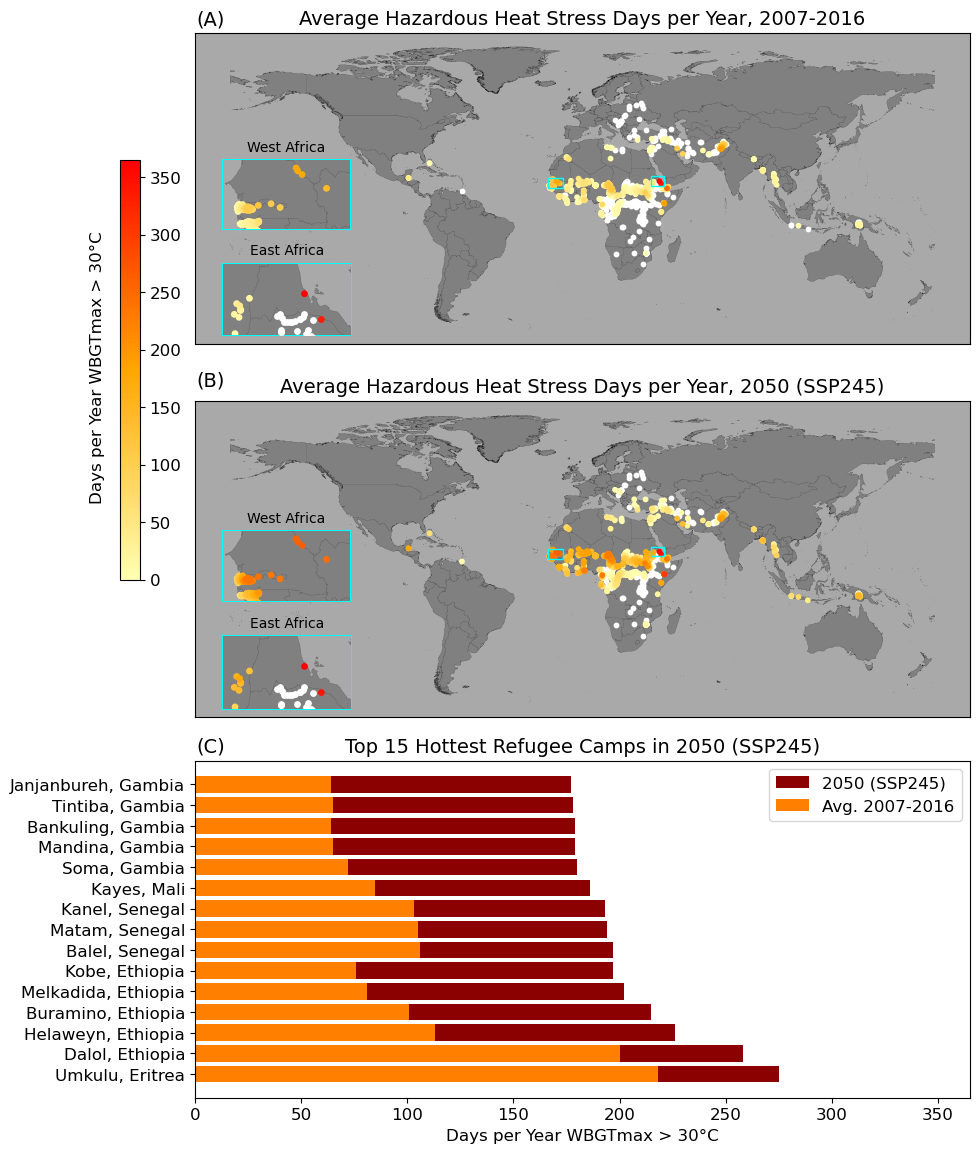

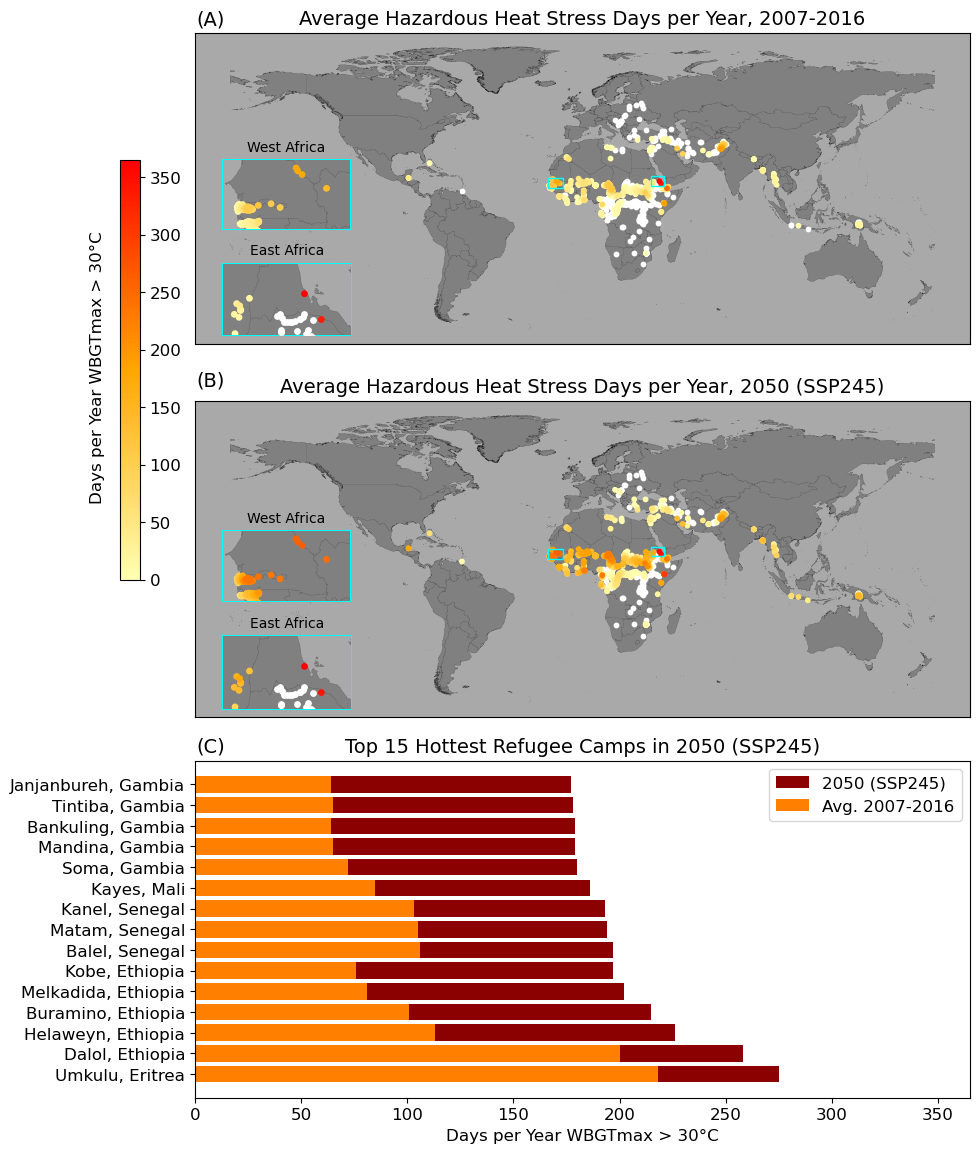

In [8]:
# Import necessary modules for insets
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as patches

# Set up
rcParams['mathtext.default'] = 'regular'  # Set text to regular, not italic 
plt.rcParams['font.size'] = 12
hs = 0.01
fig, axs = plt.subplots(3, 1, figsize=(10, 14), sharex=False)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=.1)

# Obs Map Plot 
countries.plot(ax=axs[0], edgecolor='black', linewidth=0.07, facecolor='grey')
data = obs.sort_values('obs')
data = data[data['obs'] <= 0]
data.plot(ax=axs[0], color='white', markersize=10)
data = obs.sort_values('obs')
data = data[data['obs'] > 0]
data.plot(ax=axs[0], column='obs', cmap=custom_hot, vmin=0, vmax=365, norm='linear', markersize=10)
axs[0].set_facecolor('darkgrey')

# Create insets for both maps with matching aspect ratios
aspect_ratio = 1.2  # Adjust this to match your desired aspect ratio

# Inset for West Africa (same aspect ratio)
inset_ax1 = inset_axes(axs[0], width="140%", height="90%", loc='lower left', 
                       bbox_to_anchor=(-0.1, 0.26, 0.25, 0.25), bbox_transform=axs[0].transAxes, borderpad=2)
countries.plot(ax=inset_ax1, edgecolor='black', linewidth=0.07, facecolor='grey', zorder = 1)
#fn_in = os.path.join('../data/processed/CHC-CMIP6/CASA/interim/obs.wbgtmax30.avg_count_07-16_zeros.tif')
#rst = rasterio.open(fn_in)  # Open raster
#show(rst, ax=inset_ax1, cmap=custom_hot, vmin=0, vmax=365, norm='linear', transform=rst.transform, zorder = 3)
#countries.plot(ax=inset_ax1, edgecolor='black', linewidth=0.07, facecolor='none', zorder =3)
data = obs.sort_values('obs')
data = data[data['obs'] <= 0]
data.plot(ax=inset_ax1, markersize=15, color = 'white', zorder = 2)
data = obs.sort_values('obs')
data = data[data['obs'] > 0]
data.plot(ax=inset_ax1, column='obs', cmap=custom_hot, markersize=15, zorder = 3)
inset_ax1.set_xlim(-17.7, -10)
inset_ax1.set_ylim(12, 12 + (17 - 12) / aspect_ratio)  # Adjust ylim based on aspect ratio
inset_ax1.set_xticks([])
inset_ax1.set_yticks([])
inset_ax1.set_title('West Africa', fontsize=10)
inset_ax1.patch.set_facecolor('darkgrey')  # Remove face color
inset_ax1.patch.set_alpha(0)  # Ensure transparency
for spine in inset_ax1.spines.values():
    spine.set_edgecolor('cyan')
    spine.set_linewidth(0.7)

# Inset for East Africa (same aspect ratio)
inset_ax2 = inset_axes(axs[0], width="143%", height="93%", loc='lower left', 
                       bbox_to_anchor=(-0.103, -0.08, 0.25, 0.25), bbox_transform=axs[0].transAxes, borderpad=2)
countries.plot(ax=inset_ax2, edgecolor='black', linewidth=0.07, facecolor='grey', zorder = 1)
#show(rst, ax=inset_ax2, cmap=custom_hot, vmin=0, vmax=365, norm='linear', transform=rst.transform, zorder = 3)
#countries.plot(ax=inset_ax2, edgecolor='black', linewidth=0.07, facecolor='none', zorder =3)
data = obs.sort_values('obs')
data = data[data['obs'] <= 0]
data.plot(ax=inset_ax2, markersize=15, color = 'white', zorder = 3)
data = obs.sort_values('obs')
data = data[data['obs'] > 0]
data.plot(ax=inset_ax2, markersize=15, column='obs', cmap=custom_hot, zorder = 4)
inset_ax2.set_xlim(35, 41.9)
inset_ax2.set_ylim(13.4, 13.4 + (18 - 13.4) / aspect_ratio)  # Adjust ylim based on aspect ratio
inset_ax2.set_xticks([])
inset_ax2.set_yticks([])
inset_ax2.set_title('East Africa', fontsize=10)
inset_ax2.patch.set_facecolor('darkgrey')  # Remove face color
inset_ax2.patch.set_alpha(0)  # Ensure transparency
for spine in inset_ax2.spines.values():
    spine.set_edgecolor('cyan')
    spine.set_linewidth(0.7)

# SSP 245 Map Plot
countries.plot(ax=axs[1], edgecolor='black', linewidth=0.07, facecolor='grey')
data = ssp245.sort_values('2050SSP245')
data = data[data['2050SSP245'] <= 0]
data.plot(ax=axs[1], color = 'white', markersize=10)
data = ssp245.sort_values('2050SSP245')
data = data[data['2050SSP245'] > 0]
data.plot(ax=axs[1], column='2050SSP245', cmap=custom_hot, vmin=0, vmax=365, norm='linear', markersize=10)
axs[1].set_facecolor('darkgrey')

# Create insets for both maps with matching aspect ratios
aspect_ratio = 1.2  # Adjust this to match your desired aspect ratio

# Inset for West Africa (same aspect ratio)
inset_ax3 = inset_axes(axs[1], width="140%", height="90%", loc='lower left', 
                       bbox_to_anchor=(-0.1, 0.26, 0.25, 0.25), bbox_transform=axs[1].transAxes, borderpad=2)
countries.plot(ax=inset_ax3, edgecolor='black', linewidth=0.07, facecolor='grey', zorder = 1)
#fn_in = os.path.join('../data/processed/CHC-CMIP6/CASA/interim/obs.wbgtmax30.avg_count_07-16_zeros.tif')
#rst = rasterio.open(fn_in)  # Open raster
#show(rst, ax=inset_ax1, cmap=custom_hot, vmin=0, vmax=365, norm='linear', transform=rst.transform, zorder = 3)
#countries.plot(ax=inset_ax1, edgecolor='black', linewidth=0.07, facecolor='none', zorder =3)
data = ssp245.sort_values('2050SSP245')
data = data[data['2050SSP245'] <= 0]
data.plot(ax=inset_ax3, markersize=15, color = 'white', zorder = 2)
data = ssp245.sort_values('2050SSP245')
data = data[data['2050SSP245'] > 0]
data.plot(ax=inset_ax3, column='2050SSP245', cmap=custom_hot, markersize=15, zorder = 3)
inset_ax3.set_xlim(-17.7, -10)
inset_ax3.set_ylim(12, 12 + (17 - 12) / aspect_ratio)  # Adjust ylim based on aspect ratio
inset_ax3.set_xticks([])
inset_ax3.set_yticks([])
inset_ax3.set_title('West Africa', fontsize=10)
inset_ax3.patch.set_facecolor('darkgrey')  # Remove face color
inset_ax3.patch.set_alpha(0)  # Ensure transparency
for spine in inset_ax3.spines.values():
    spine.set_edgecolor('cyan')
    spine.set_linewidth(0.7)

# Inset for East Africa (same aspect ratio)
inset_ax4 = inset_axes(axs[1], width="143%", height="93%", loc='lower left', 
                       bbox_to_anchor=(-0.103, -0.08, 0.25, 0.25), bbox_transform=axs[1].transAxes, borderpad=2)
countries.plot(ax=inset_ax4 , edgecolor='black', linewidth=0.07, facecolor='grey', zorder = 1)
#show(rst, ax=inset_ax2, cmap=custom_hot, vmin=0, vmax=365, norm='linear', transform=rst.transform, zorder = 3)
#countries.plot(ax=inset_ax2, edgecolor='black', linewidth=0.07, facecolor='none', zorder =3)
data = ssp245.sort_values('2050SSP245')
data = data[data['2050SSP245'] <= 0]
data.plot(ax=inset_ax4, markersize=15, color = 'white', zorder = 2)
data = ssp245.sort_values('2050SSP245')
data = data[data['2050SSP245'] > 0]
data.plot(ax=inset_ax4, markersize=15, column='2050SSP245', cmap=custom_hot, zorder = 4)
inset_ax4.set_xlim(35, 41.9)
inset_ax4.set_ylim(13.4, 13.4 + (18 - 13.4) / aspect_ratio)  # Adjust ylim based on aspect ratio
inset_ax4.set_xticks([])
inset_ax4.set_yticks([])
inset_ax4.set_title('East Africa', fontsize=10)
inset_ax4.patch.set_facecolor('darkgrey')  # Remove face color
inset_ax4.patch.set_alpha(0)  # Ensure transparency
for spine in inset_ax4.spines.values():
    spine.set_edgecolor('cyan')
    spine.set_linewidth(0.7)

# Turn the grid border off
axs[0].set_xticks([])
axs[1].set_xticks([])
axs[0].set_yticks([])
axs[1].set_yticks([])

# Top 15 SSP 245 
data = ssp245.sort_values('2050SSP245', ascending=False).iloc[:15, :]
data = pd.merge(data, gdf[['gis_name', 'pcode']], on='pcode', how='left')
data['country'] = ['Eritrea', 'Ethiopia', 'Ethiopia', 'Ethiopia', 'Ethiopia', 'Ethiopia', 'Senegal', 'Senegal',
                   'Senegal', 'Mali', 'Gambia', 'Gambia', 'Gambia', 'Gambia', 'Gambia']
data['label'] = data['gis_name'] + ', ' + data['country']
data = pd.merge(data, obs[['pcode', 'obs']], on='pcode', how='left')

# Bar chart
axs[2].barh(y=data['label'], width=data['2050SSP245'], color='darkred')
axs[2].barh(y=data['label'], width=data['obs'], color='#ff8000')
axs[2].set_xlim([0, 365])
axs[2].legend(labels=['2050 (SSP245)', 'Avg. 2007-2016'])
axs[2].set_xlabel('Days per Year WBGTmax > 30°C')

# Color bar
norm = mcolors.Normalize(vmin=0, vmax=365)
cb_ax = fig.add_axes([.05, 0.48, 0.02, 0.3])
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=custom_hot), orientation='vertical', cax=cb_ax)
cb_ax.text(-1.5, 69, 'Days per Year WBGTmax > 30°C', rotation=90)

# Titles
axs[0].set_title('Average Hazardous Heat Stress Days per Year, 2007-2016', fontsize=14)
axs[1].set_title('Average Hazardous Heat Stress Days per Year, 2050 (SSP245)', fontsize=14)
axs[2].set_title('Top 15 Hottest Refugee Camps in 2050 (SSP245)', fontsize=14)

# Labels
axs[0].text(-197, 95, '(A)', fontsize=14)
axs[0].text(-197, -88, '(B)', fontsize=14)
axs[1].text(-197, -84, '(C)', fontsize=14)

# Highlight West and East Africa
# Add a bounding box for the West Africa inset on the main map in Panel A (axs[0])
bbox_west_africa = patches.Rectangle(
    (-17.7, 12),  # Bottom-left corner (xmin, ymin)
    7.7, 5,  # Width and height (difference between xlim and ylim)
    linewidth=1, edgecolor='cyan', facecolor='none', zorder=4
)
axs[0].add_patch(bbox_west_africa)

# Add a bounding box for the East Africa inset on the main map in Panel A (axs[0])
bbox_east_africa = patches.Rectangle(
    (35, 13.4),  # Bottom-left corner (xmin, ymin)
    6.9, 4.6,  # Width and height (difference between xlim and ylim)
    linewidth=1, edgecolor='cyan', facecolor='none', zorder=4
)
axs[0].add_patch(bbox_east_africa)

# Similarly, add bounding boxes for the corresponding areas on the map in Panel B (axs[1])
bbox_west_africa_b = patches.Rectangle(
    (-17.7, 12),  # Bottom-left corner (xmin, ymin)
    7.7, 5,  # Width and height
    linewidth=1, edgecolor='cyan', facecolor='none', zorder=4
)
axs[1].add_patch(bbox_west_africa_b)

bbox_east_africa_b = patches.Rectangle(
    (35, 13.4),  # Bottom-left corner (xmin, ymin)
    6.9, 4.6,  # Width and height
    linewidth=1, edgecolor='cyan', facecolor='none', zorder=4
)
axs[1].add_patch(bbox_east_africa_b)

# Save the figure
fn_out = os.path.join('../data/figs/wbgt30_refugees_update_A.png')
plt.savefig(fn_out, dpi=300, bbox_inches='tight')

In [ ]:
# Import necessary modules for insets
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as patches

# Set up
rcParams['mathtext.default'] = 'regular'  # Set text to regular, not italic 
plt.rcParams['font.size'] = 12
hs = 0.01
fig, axs = plt.subplots(3, 1, figsize=(10, 14), sharex=False)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=.1)

# Obs Map Plot 
countries.plot(ax=axs[0], edgecolor='black', linewidth=0.07, facecolor='grey')
data = obs.sort_values('obs')
data = data[data['obs'] <= 0]
data.plot(ax=axs[0], color='black', markersize=10)
data = obs.sort_values('obs')
data = data[data['obs'] > 0]
data.plot(ax=axs[0], column='obs', cmap=custom_hot, vmin=0, vmax=365, norm='linear', markersize=10, edgecolor = 'black', lw = 0.05)
axs[0].set_facecolor('darkgrey')

# Create insets for both maps with matching aspect ratios
aspect_ratio = 1.2  # Adjust this to match your desired aspect ratio

# Inset for West Africa (same aspect ratio)
inset_ax1 = inset_axes(axs[0], width="140%", height="90%", loc='lower left', 
                       bbox_to_anchor=(-0.1, 0.26, 0.25, 0.25), bbox_transform=axs[0].transAxes, borderpad=2)
countries.plot(ax=inset_ax1, edgecolor='black', linewidth=0.07, facecolor='grey', zorder = 1)
fn_in = os.path.join('../data/processed/CHC-CMIP6/CASA/interim/obs.wbgtmax30.avg_count_07-16_zeros.tif')
rst = rasterio.open(fn_in)  # Open raster
show(rst, ax=inset_ax1, cmap=custom_hot, vmin=0, vmax=365, norm='linear', transform=rst.transform, zorder = 3)
countries.plot(ax=inset_ax1, edgecolor='black', linewidth=0.07, facecolor='none', zorder = 4)
data = obs.sort_values('obs')
data.plot(ax=inset_ax1, markersize=10, color = 'none', edgecolor = 'black', lw = 0.5, zorder = 5)
inset_ax1.set_xlim(-17.7, -10)
inset_ax1.set_ylim(12, 12 + (17 - 12) / aspect_ratio)  # Adjust ylim based on aspect ratio
inset_ax1.set_xticks([])
inset_ax1.set_yticks([])
inset_ax1.set_title('West Africa', fontsize=10)
inset_ax1.patch.set_facecolor('darkgrey')  # Remove face color
inset_ax1.patch.set_alpha(0)  # Ensure transparency
for spine in inset_ax1.spines.values():
    spine.set_edgecolor('cyan')
    spine.set_linewidth(0.7)
    spine.set_zorder(6)

# Inset for East Africa (same aspect ratio)
inset_ax2 = inset_axes(axs[0], width="143%", height="93%", loc='lower left', 
                       bbox_to_anchor=(-0.103, -0.08, 0.25, 0.25), bbox_transform=axs[0].transAxes, borderpad=2)
countries.plot(ax=inset_ax2, edgecolor='black', linewidth=0.07, facecolor='grey', zorder = 1)
fn_in = os.path.join('../data/processed/CHC-CMIP6/CASA/interim/obs.wbgtmax30.avg_count_07-16_zeros.tif')
rst = rasterio.open(fn_in)  # Open raster
show(rst, ax=inset_ax2, cmap=custom_hot, vmin=0, vmax=365, norm='linear', transform=rst.transform, zorder = 3)
countries.plot(ax=inset_ax2, edgecolor='black', linewidth=0.07, facecolor='none', zorder = 4)
data = obs.sort_values('obs')
data.plot(ax=inset_ax2, markersize=10, color = 'none', edgecolor = 'black', lw = 0.5, zorder = 5)
inset_ax2.set_xlim(35, 41.9)
inset_ax2.set_ylim(13.4, 13.4 + (18 - 13.4) / aspect_ratio)  # Adjust ylim based on aspect ratio
inset_ax2.set_xticks([])
inset_ax2.set_yticks([])
inset_ax2.set_title('East Africa', fontsize=10)
inset_ax2.patch.set_facecolor('darkgrey')  # Remove face color
inset_ax2.patch.set_alpha(0)  # Ensure transparency
for spine in inset_ax2.spines.values():
    spine.set_edgecolor('cyan')
    spine.set_linewidth(0.7)
    spine.set_zorder(6)

# SSP 245 Map Plot
countries.plot(ax=axs[1], edgecolor='black', linewidth=0.07, facecolor='grey')
data = ssp245.sort_values('2050SSP245')
data = data[data['2050SSP245'] <= 0]
data.plot(ax=axs[1], color = 'black', markersize=10)
data = ssp245.sort_values('2050SSP245')
data = data[data['2050SSP245'] > 0]
data.plot(ax=axs[1], column='2050SSP245', cmap=custom_hot, vmin=0, vmax=365, norm='linear', markersize=10)
axs[1].set_facecolor('darkgrey')

# Create insets for both maps with matching aspect ratios
aspect_ratio = 1.2  # Adjust this to match your desired aspect ratio

# Inset for West Africa (same aspect ratio)
inset_ax3 = inset_axes(axs[1], width="140%", height="90%", loc='lower left', 
                       bbox_to_anchor=(-0.1, 0.26, 0.25, 0.25), bbox_transform=axs[1].transAxes, borderpad=2)
countries.plot(ax=inset_ax3, edgecolor='black', linewidth=0.07, facecolor='grey', zorder = 1)
fn_in = os.path.join('../data/processed/CHC-CMIP6/CASA/interim/2050_SSP245.wbgtmax30.avg_count_07-16_zeros.tif')
rst = rasterio.open(fn_in)  # Open raster
show(rst, ax=inset_ax3, cmap=custom_hot, vmin=0, vmax=365, norm='linear', transform=rst.transform, zorder = 3)
countries.plot(ax=inset_ax3, edgecolor='black', linewidth=0.07, facecolor='none', zorder = 4)
data = ssp245.sort_values('2050SSP245')
data.plot(ax=inset_ax3, markersize=10, color = 'none', edgecolor = 'black', lw = 0.5, zorder = 5)
inset_ax3.set_xlim(-17.7, -10)
inset_ax3.set_ylim(12, 12 + (17 - 12) / aspect_ratio)  # Adjust ylim based on aspect ratio
inset_ax3.set_xticks([])
inset_ax3.set_yticks([])
inset_ax3.set_title('West Africa', fontsize=10)
inset_ax3.patch.set_facecolor('darkgrey')  # Remove face color
inset_ax3.patch.set_alpha(0)  # Ensure transparency
for spine in inset_ax3.spines.values():
    spine.set_edgecolor('cyan')
    spine.set_linewidth(0.7)
    spine.set_zorder(6)

# Inset for East Africa (same aspect ratio)
inset_ax4 = inset_axes(axs[1], width="143%", height="93%", loc='lower left', 
                       bbox_to_anchor=(-0.103, -0.08, 0.25, 0.25), bbox_transform=axs[1].transAxes, borderpad=2)
countries.plot(ax=inset_ax4 , edgecolor='black', linewidth=0.07, facecolor='grey', zorder = 1)
fn_in = os.path.join('../data/processed/CHC-CMIP6/CASA/interim/2050_SSP245.wbgtmax30.avg_count_07-16_zeros.tif')
rst = rasterio.open(fn_in)  # Open raster
show(rst, ax=inset_ax4, cmap=custom_hot, vmin=0, vmax=365, norm='linear', transform=rst.transform, zorder = 3)
countries.plot(ax=inset_ax4, edgecolor='black', linewidth=0.07, facecolor='none', zorder = 4)
data = ssp245.sort_values('2050SSP245')
data.plot(ax=inset_ax4, markersize=10, color = 'none', edgecolor = 'black', lw = 0.5, zorder = 5)
inset_ax4.set_xlim(35, 41.9)
inset_ax4.set_ylim(13.4, 13.4 + (18 - 13.4) / aspect_ratio)  # Adjust ylim based on aspect ratio
inset_ax4.set_xticks([])
inset_ax4.set_yticks([])
inset_ax4.set_title('East Africa', fontsize=10)
inset_ax4.patch.set_facecolor('darkgrey')  # Remove face color
inset_ax4.patch.set_alpha(0)  # Ensure transparency
for spine in inset_ax4.spines.values():
    spine.set_edgecolor('cyan')
    spine.set_linewidth(0.7)
    spine.set_zorder(6)

# Turn the grid border off
axs[0].set_xticks([])
axs[1].set_xticks([])
axs[0].set_yticks([])
axs[1].set_yticks([])

# Top 15 SSP 245 
data = ssp245.sort_values('2050SSP245', ascending=False).iloc[:15, :]
data = pd.merge(data, gdf[['gis_name', 'pcode']], on='pcode', how='left')
data['country'] = ['Eritrea', 'Ethiopia', 'Ethiopia', 'Ethiopia', 'Ethiopia', 'Ethiopia', 'Senegal', 'Senegal',
                   'Senegal', 'Mali', 'Gambia', 'Gambia', 'Gambia', 'Gambia', 'Gambia']
data['label'] = data['gis_name'] + ', ' + data['country']
data = pd.merge(data, obs[['pcode', 'obs']], on='pcode', how='left')

# Bar chart
axs[2].barh(y=data['label'], width=data['2050SSP245'], color='darkred')
axs[2].barh(y=data['label'], width=data['obs'], color='#ff8000')
axs[2].set_xlim([0, 365])
axs[2].legend(labels=['2050 (SSP245)', 'Avg. 2007-2016'])
axs[2].set_xlabel('Days per Year WBGTmax > 30°C')

# Color bar
norm = mcolors.Normalize(vmin=0, vmax=365)
cb_ax = fig.add_axes([.05, 0.48, 0.02, 0.3])
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=custom_hot), orientation='vertical', cax=cb_ax)
cb_ax.text(-1.5, 69, 'Days per Year WBGTmax > 30°C', rotation=90)

# Titles
axs[0].set_title('Average Hazardous Heat Stress Days per Year, 2007-2016', fontsize=14)
axs[1].set_title('Average Hazardous Heat Stress Days per Year, 2050 (SSP245)', fontsize=14)
axs[2].set_title('Top 15 Hottest Refugee Camps in 2050 (SSP245)', fontsize=14)

# Labels
axs[0].text(-197, 95, '(A)', fontsize=14)
axs[0].text(-197, -88, '(B)', fontsize=14)
axs[1].text(-197, -84, '(C)', fontsize=14)

# Highlight West and East Africa
# Add a bounding box for the West Africa inset on the main map in Panel A (axs[0])
bbox_west_africa = patches.Rectangle(
    (-17.7, 12),  # Bottom-left corner (xmin, ymin)
    7.7, 5,  # Width and height (difference between xlim and ylim)
    linewidth=1, edgecolor='cyan', facecolor='none', zorder=4
)
axs[0].add_patch(bbox_west_africa)

# Add a bounding box for the East Africa inset on the main map in Panel A (axs[0])
bbox_east_africa = patches.Rectangle(
    (35, 13.4),  # Bottom-left corner (xmin, ymin)
    6.9, 4.6,  # Width and height (difference between xlim and ylim)
    linewidth=1, edgecolor='cyan', facecolor='none', zorder=4
)
axs[0].add_patch(bbox_east_africa)

# Similarly, add bounding boxes for the corresponding areas on the map in Panel B (axs[1])
bbox_west_africa_b = patches.Rectangle(
    (-17.7, 12),  # Bottom-left corner (xmin, ymin)
    7.7, 5,  # Width and height
    linewidth=1, edgecolor='cyan', facecolor='none', zorder=4
)
axs[1].add_patch(bbox_west_africa_b)

bbox_east_africa_b = patches.Rectangle(
    (35, 13.4),  # Bottom-left corner (xmin, ymin)
    6.9, 4.6,  # Width and height
    linewidth=1, edgecolor='cyan', facecolor='none', zorder=4
)
axs[1].add_patch(bbox_east_africa_b)

# Save the figure
fn_out = os.path.join('../data/figs/wbgt30_refugees_update_B.png')
plt.savefig(fn_out, dpi=300, bbox_inches='tight')

# Old code

In [ ]:
# set up 
ssp = '2050_SSP585' #'2050_SSP585', obs, '2050_SSP245'
col = '2050SSP585' # no _
data = 'wbgtmax'
thresh = '30'
path = '../data/processed/CHC-CMIP6/'
fn_in = os.path.join(path, 'CASA/interim/' + ssp + '.' + data + thresh + '.avg_count_07-16.tif')

In [ ]:
fn_in

In [ ]:
# open raster
arr = rasterio.open(fn_in).read(1)

# mask it
mask = arr[arr == -9999]
arr_mask = np.ma.masked_values(arr, -9999)

In [ ]:
# Set up
rcParams['mathtext.default'] = 'regular'  # Set text to regular, not italic
plt.rcParams['font.size'] = 12
hs = 0.01
fig, axs = plt.subplots(1, figsize=(5, 5), sharex=False)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.1)

# Plot using imshow with vmin and vmax for consistent color scaling
im = axs.imshow(arr_mask[700:1500, 4200:4700], vmin=0, vmax=365, cmap='Reds')

# Add colorbar for the imshow plot, specifying the mappable object and the axes
cbar = fig.colorbar(im, ax=axs, orientation='vertical')
cbar.set_label('Days per Year WBGTmax > 30°C', rotation=90)
plt.title('SSP 245')

In [ ]:
# set up
rcParams['mathtext.default'] = 'regular' # set text to reg, not italic 
plt.rcParams['font.size'] = 12
hs = 0.01
fig, axs = plt.subplots(3, 1, figsize = (10, 14), sharex=False)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=.1)

# Obs Map Plot 
countries.plot(ax=axs[0], edgecolor = 'black', linewidth = 0.07, facecolor = 'gray')
data = obs.sort_values('obs')
data.plot(ax = axs[0], column = 'obs', cmap = 'Reds', vmin = 0, vmax = 365, norm = 'linear', markersize = 10)
axs[0].set_facecolor('darkgray')

# SSP 245 Map Plot
countries.plot(ax=axs[1], edgecolor = 'black', linewidth = 0.07, facecolor = 'gray')
data = ssp245.sort_values('2050SSP245')
data.plot(ax = axs[1], column = '2050SSP245', cmap = 'Reds', vmin = 0, vmax = 365, norm = 'linear', markersize = 10)
axs[1].set_facecolor('darkgray')

# turn the grid boarder off
axs[0].set_xticks([]);
axs[1].set_xticks([]);
axs[0].set_yticks([]);
axs[1].set_yticks([]);

# Top 15 SSP 245 
data = ssp245.sort_values('2050SSP245', ascending = False).iloc[:15, :]
data = pd.merge(data, gdf[['gis_name', 'pcode']], on = 'pcode', how = 'left')
data['country'] = ['Eritrea', 'Ethiopia', 'Ethiopia', 'Ethiopia', 'Ethiopia', 'Ethiopia', 'Senegal', 'Senegal',
                  'Senegal', 'Mali', 'Gambia', 'Gambia', 'Gambia', 'Gambia', 'Gambia']
data['label'] = data['gis_name'] + ', ' + data['country']
data = pd.merge(data, obs[['pcode', 'obs']], on = 'pcode', how = 'left')

# bar chart
axs[2].barh(y = data['label'], width = data['2050SSP245'], color = 'darkred')
axs[2].barh(y = data['label'], width = data['obs'], color = '#ff8000')
axs[2].set_xlim([0, 365])
axs[2].legend(labels = ['2050 (SSP245)', 'Avg. 2007-2016'])
axs[2].set_xlabel('Days per Year WBGTmax > 30°C');

# color bar
norm = mcolors.Normalize(vmin=0, vmax=365)
cb_ax = fig.add_axes([.05, 0.48, 0.02, 0.3])
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap='Reds'), orientation='vertical', cax=cb_ax)
cb_ax.text(-1.5,69,'Days per Year WBGTmax > 30°C',rotation=90);

# titles
axs[0].set_title('Average Hazardous Heat Stress Days per Year, 2007-2016', fontsize = 14)  #'WBGTmax Correlation'
axs[1].set_title('Average Hazardous Heat Stress Days per Year, 2050 (SSP245)', fontsize = 14)
axs[2].set_title('Top 15 Hottest Refugee Camps in 2050 (SSP245)', fontsize = 14)

# labels
axs[0].text(-197, 95, '(A)', fontsize = 14); #transform=axs[0].transAxes, size=15, fontweight='bold')
axs[0].text(-197, -88, '(B)', fontsize = 14); #transform=axs[0].transAxes, size=15, fontweight='bold')
axs[1].text(-197, -84, '(C)', fontsize = 14); #transform=axs[0].transAxes, size=15, fontweight='bold')

# highlight W and E Africa
rect11 = patches.Rectangle((-20, 9), 12, 12, linewidth=1.3, edgecolor='yellow', facecolor='none')
rect21 = patches.Rectangle((-20, 9), 12, 12, linewidth=1.3, edgecolor='yellow', facecolor='none')
axs[0].add_patch(rect11)
axs[1].add_patch(rect21)
rect21 = patches.Rectangle((35, 11.5), 8, 8, linewidth=1.3, edgecolor='yellow', facecolor='none')
rect22 = patches.Rectangle((35, 11.5), 8, 8, linewidth=1.3, edgecolor='yellow', facecolor='none')
axs[0].add_patch(rect21)
axs[1].add_patch(rect22)

# Save it
fn_out = os.path.join('../data/figs/wbgt30_refugees.png')
#plt.savefig(fn_out, dpi = 300, bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cbook
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, zoomed_inset_axes

fig, (ax, ax2) = plt.subplots(ncols=2, figsize=[6, 3])


# First subplot, showing an inset with a size bar.
ax.set_aspect(1)

axins = zoomed_inset_axes(ax, zoom=0.5, loc='upper right')
# fix the number of ticks on the inset Axes
axins.yaxis.get_major_locator().set_params(nbins=7)
axins.xaxis.get_major_locator().set_params(nbins=7)
axins.tick_params(labelleft=False, labelbottom=False)


def add_sizebar(ax, size):
    asb = AnchoredSizeBar(ax.transData,
                          size,
                          str(size),
                          loc=8,
                          pad=0.1, borderpad=0.5, sep=5,
                          frameon=False)
    ax.add_artist(asb)

add_sizebar(ax, 0.5)
add_sizebar(axins, 0.5)


# Second subplot, showing an image with an inset zoom and a marked inset
Z = cbook.get_sample_data("axes_grid/bivariate_normal.npy")  # 15x15 array
extent = (-3, 4, -4, 3)
Z2 = np.zeros((150, 150))
ny, nx = Z.shape
Z2[30:30+ny, 30:30+nx] = Z

ax2.imshow(Z2, extent=extent, origin="lower")

axins2 = zoomed_inset_axes(ax2, zoom=6, loc=1)
axins2.imshow(Z2, extent=extent, origin="lower")

# subregion of the original image
x1, x2, y1, y2 = -1.5, -0.9, -2.5, -1.9
axins2.set_xlim(x1, x2)
axins2.set_ylim(y1, y2)
# fix the number of ticks on the inset Axes
axins2.yaxis.get_major_locator().set_params(nbins=7)
axins2.xaxis.get_major_locator().set_params(nbins=7)
axins2.tick_params(labelleft=False, labelbottom=False)

# draw a bbox of the region of the inset Axes in the parent Axes and
# connecting lines between the bbox and the inset Axes area
mark_inset(ax2, axins2, loc1=2, loc2=4, fc="none", ec="0.5")

plt.show()

In [ ]:
# set up
rcParams['mathtext.default'] = 'regular' # set text to reg, not italic 
plt.rcParams['font.size'] = 20
hs = 0.01
fig, axs = plt.subplots(2, 2, figsize = (22, 14), sharex=False, width_ratios = [1, 3])
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=.1)

# Top 15 Observations
data = obs.sort_values('obs', ascending = False).iloc[:10, :]
data = pd.merge(data, gdf[['gis_name', 'pcode']], on = 'pcode', how = 'left')
data['country'] = ['Eritrea', 'Ethiopia', 'Djibouti', 'Pakistan', 'Ethiopia', 'Senegal', 'Pakistan', 'Senegal',
                  'Senegal', 'Ethiopia'] #, 'Pakistan', 'Mali', 'Pakistan', 'Pakistan', 'Ethiopia']
data['label'] = data['gis_name'] + ', ' + data['country']

# bar chart
axs[0][0].barh(y = data['label'], width = data['obs'], color = '#ff8000')
axs[0][0].set_xlim([0, 300])

# Top 15 SSP 245 
data = ssp245.sort_values('2050SSP245', ascending = False).iloc[:10, :]
data = pd.merge(data, gdf[['gis_name', 'pcode']], on = 'pcode', how = 'left')
data['country'] = ['Eritrea', 'Ethiopia', 'Ethiopia', 'Ethiopia', 'Ethiopia', 'Ethiopia', 'Senegal', 'Senegal',
                  'Senegal', 'Mali'] #, 'Gambia', 'Gambia', 'Gambia', 'Gambia', 'Gambia']
data['label'] = data['gis_name'] + ', ' + data['country']

# bar chart
axs[1][0].barh(y = data['label'], width = data['2050SSP245'], color = '#ff8000')
axs[1][0].set_xlim([0, 300])

# Obs Map Plot 
countries.plot(ax=axs[0][1], edgecolor = 'black', linewidth = 0.1, facecolor = 'gray')
data = obs.sort_values('obs')
data.plot(ax = axs[0][1], column = 'obs', cmap = 'Reds', vmin = 0, vmax = 100, norm = 'linear', markersize = 10)
axs[0][1].set_facecolor('darkgray')

# SSP 245 Map Plot
countries.plot(ax=axs[1][1], edgecolor = 'black', linewidth = 0.1, facecolor = 'gray')
data = ssp245.sort_values('2050SSP245')
data.plot(ax = axs[1][1], column = '2050SSP245', cmap = 'Reds', vmin = 0, vmax = 100, norm = 'linear', markersize = 10)
axs[1][1].set_facecolor('darkgray')

# turn the grid boarder off
axs[0][1].set_xticks([]);
axs[1][1].set_xticks([]);
axs[0][1].set_yticks([]);
axs[1][1].set_yticks([]);

In [ ]:
# set up
# Create 2x2 sub plots
gs = gridspec.GridSpec(2, 2)
plt.figure(figsize = (20,8))

# Top 15 SSP 245 
data = ssp245.sort_values('2050SSP245', ascending = False).iloc[:15, :]
data = pd.merge(data, gdf[['gis_name', 'pcode']], on = 'pcode', how = 'left')
data['country'] = ['Eritrea', 'Ethiopia', 'Ethiopia', 'Ethiopia', 'Ethiopia', 'Ethiopia', 'Senegal', 'Senegal',
                  'Senegal', 'Mali', 'Gambia', 'Gambia', 'Gambia', 'Gambia', 'Gambia']
data['label'] = data['gis_name'] + ', ' + data['country']
data = pd.merge(data, obs[['pcode', 'obs']], on = 'pcode', how = 'left')

# bar chart
ax1 = plt.subplot(gs[:, 0:]) # row 0, col 0
ax1.barh(y = data['label'], width = data['2050SSP245'], color = 'darkred')
ax1.barh(y = data['label'], width = data['obs'], color = '#ff8000')
ax1.set_xlim([0, 300])
ax1.legend(labels = ['SSP245 2050', 'Observations'])





In [ ]:
# Top 15 Observations
data = obs.sort_values('obs', ascending = False).iloc[:15, :]
data = pd.merge(data, gdf[['gis_name', 'pcode']], on = 'pcode', how = 'left')
data['country'] = ['Eritrea', 'Ethiopia', 'Djibouti', 'Pakistan', 'Ethiopia', 'Senegal', 'Pakistan', 'Senegal',
                  'Senegal', 'Ethiopia', 'Pakistan', 'Mali', 'Pakistan', 'Pakistan', 'Ethiopia']
data['label'] = data['gis_name'] + ', ' + data['country']
data

In [ ]:
# Top 15 SSP 245 
data = ssp245.sort_values('2050SSP245', ascending = False).iloc[:15, :]
data = pd.merge(data, gdf[['gis_name', 'pcode']], on = 'pcode', how = 'left')
data['country'] = ['Eritrea', 'Ethiopia', 'Ethiopia', 'Ethiopia', 'Ethiopia', 'Ethiopia', 'Senegal', 'Senegal',
                  'Senegal', 'Mali', 'Gambia', 'Gambia', 'Gambia', 'Gambia', 'Gambia']
data['label'] = data['gis_name'] + ', ' + data['country']
data

In [ ]:
# set up
rcParams['mathtext.default'] = 'regular' # set text to reg, not italic 
hs = 0.01
fig, axs = plt.subplots(2, 1, figsize = (8, 20), sharex=False)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.1)

# Top 15 Observations
data = obs.sort_values('obs', ascending = False).iloc[:15, :]
data = pd.merge(data, gdf[['gis_name', 'pcode']], on = 'pcode', how = 'left')
data['country'] = ['Eritrea', 'Ethiopia', 'Djibouti', 'Pakistan', 'Ethiopia', 'Senegal', 'Pakistan', 'Senegal',
                  'Senegal', 'Ethiopia', 'Pakistan', 'Mali', 'Pakistan', 'Pakistan', 'Ethiopia']
data['label'] = data['gis_name'] + ', ' + data['country']

# bar chart
axs[0].barh(y = data['label'], width = data['obs'])
axs[0].set_xlim([0, 300])


# Top 15 SSP 245 
data = ssp245.sort_values('2050SSP245', ascending = False).iloc[:15, :]
data = pd.merge(data, gdf[['gis_name', 'pcode']], on = 'pcode', how = 'left')
data['country'] = ['Eritrea', 'Ethiopia', 'Ethiopia', 'Ethiopia', 'Ethiopia', 'Ethiopia', 'Senegal', 'Senegal',
                  'Senegal', 'Mali', 'Gambia', 'Gambia', 'Gambia', 'Gambia', 'Gambia']
data['label'] = data['gis_name'] + ', ' + data['country']

# bar chart
axs[1].barh(y = data['label'], width = data['2050SSP245'])
axs[1].set_xlim([0, 300])

In [ ]:
plt.rcParams['font.size'] = 12

# Top 15 SSP 245 
data = ssp245.sort_values('2050SSP245', ascending = False).iloc[:15, :]
data = pd.merge(data, gdf[['gis_name', 'pcode']], on = 'pcode', how = 'left')
data['country'] = ['Eritrea', 'Ethiopia', 'Ethiopia', 'Ethiopia', 'Ethiopia', 'Ethiopia', 'Senegal', 'Senegal',
                  'Senegal', 'Mali', 'Gambia', 'Gambia', 'Gambia', 'Gambia', 'Gambia']
data['label'] = data['gis_name'] + ', ' + data['country']
data = pd.merge(data, obs[['pcode', 'obs']], on = 'pcode', how = 'left')

# bar chart
plt.barh(y = data['label'], width = data['2050SSP245'])
plt.barh(y = data['label'], width = data['obs'], color = 'orange')
plt.xlim([0, 300])

plt.legend(labels = ['Observations', 'SSP245 2050'])

In [ ]:
plt.hist(obs['obs'])